In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

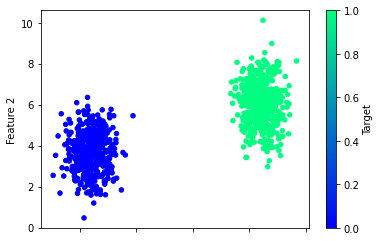

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 602us/step - loss: 0.6320 - accuracy: 0.8133
Epoch 2/100
24/24 [==============================] - 0s 493us/step - loss: 0.6232 - accuracy: 0.8360
Epoch 3/100
24/24 [==============================] - 0s 492us/step - loss: 0.6135 - accuracy: 0.8627
Epoch 4/100
24/24 [==============================] - 0s 495us/step - loss: 0.6025 - accuracy: 0.8867
Epoch 5/100
24/24 [==============================] - 0s 483us/step - loss: 0.5902 - accuracy: 0.9173
Epoch 6/100
24/24 [==============================] - 0s 526us/step - loss: 0.5770 - accuracy: 0.9387
Epoch 7/100
24/24 [==============================] - 0s 480us/step - loss: 0.5630 - accuracy: 0.9533
Epoch 8/100
24/24 [==============================] - 0s 460us/step - loss: 0.5484 - accuracy: 0.9613
Epoch 9/100
24/24 [==============================] - 0s 461us/step - loss: 0.5335 - accuracy: 0.9720
Epoch 10/100
24/24 [==============================] - 0s 459us/step - loss: 0.5182 - accura

24/24 [==============================] - 0s 479us/step - loss: 0.0936 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 478us/step - loss: 0.0921 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 454us/step - loss: 0.0906 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 449us/step - loss: 0.0891 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 469us/step - loss: 0.0877 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 491us/step - loss: 0.0863 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 452us/step - loss: 0.0849 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 470us/step - loss: 0.0836 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 468us/step - loss: 0.0823 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 465us/step - loss: 0.0810 - accuracy: 

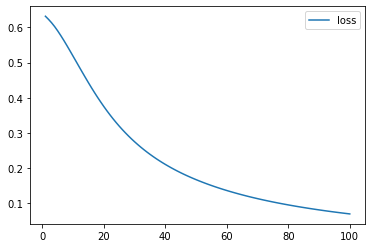

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

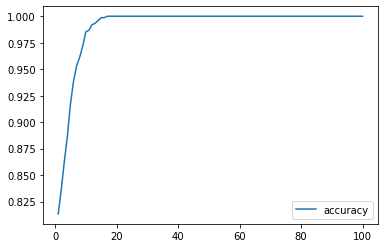

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0654 - accuracy: 1.0000
Loss: 0.06535060703754425, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

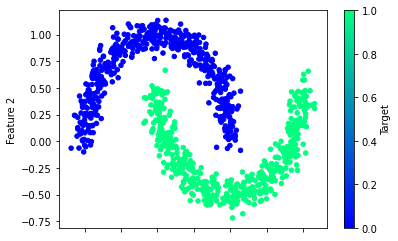

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 796us/step - loss: 0.7480 - accuracy: 0.6453
Epoch 2/100
24/24 [==============================] - 0s 687us/step - loss: 0.6760 - accuracy: 0.6720
Epoch 3/100
24/24 [==============================] - 0s 689us/step - loss: 0.6223 - accuracy: 0.6840
Epoch 4/100
24/24 [==============================] - 0s 710us/step - loss: 0.5851 - accuracy: 0.6960
Epoch 5/100
24/24 [==============================] - 0s 698us/step - loss: 0.5564 - accuracy: 0.7080
Epoch 6/100
24/24 [==============================] - 0s 732us/step - loss: 0.5333 - accuracy: 0.7147
Epoch 7/100
24/24 [==============================] - 0s 735us/step - loss: 0.5154 - accuracy: 0.7200
Epoch 8/100
24/24 [==============================] - 0s 719us/step - loss: 0.4994 - accuracy: 0.7293
Epoch 9/100
24/24 [==============================] - 0s 699us/step - loss: 0.4859 - accuracy: 0.7387
Epoch 10/100
24/24 [==============================] - 0s 717us/step - loss: 0.4738 - accura

24/24 [==============================] - 0s 719us/step - loss: 0.2645 - accuracy: 0.8920
Epoch 82/100
24/24 [==============================] - 0s 730us/step - loss: 0.2640 - accuracy: 0.8933
Epoch 83/100
24/24 [==============================] - 0s 697us/step - loss: 0.2638 - accuracy: 0.8933
Epoch 84/100
24/24 [==============================] - 0s 711us/step - loss: 0.2633 - accuracy: 0.8933
Epoch 85/100
24/24 [==============================] - 0s 710us/step - loss: 0.2630 - accuracy: 0.8933
Epoch 86/100
24/24 [==============================] - 0s 718us/step - loss: 0.2626 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 730us/step - loss: 0.2623 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 733us/step - loss: 0.2620 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 693us/step - loss: 0.2618 - accuracy: 0.8907
Epoch 90/100
24/24 [==============================] - 0s 706us/step - loss: 0.2614 - accuracy: 

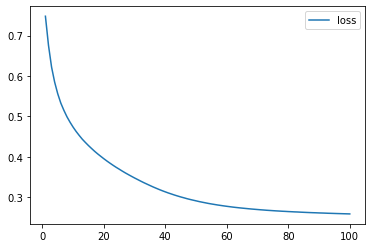

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

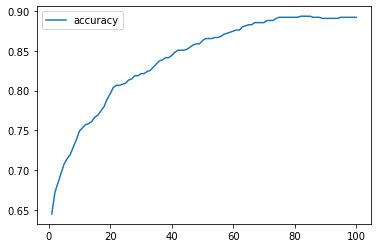

In [19]:
# Plot the loss
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 539us/step - loss: 0.9482 - accuracy: 0.1787
Epoch 2/100
24/24 [==============================] - 0s 477us/step - loss: 0.8874 - accuracy: 0.1693
Epoch 3/100
24/24 [==============================] - 0s 473us/step - loss: 0.8368 - accuracy: 0.1747
Epoch 4/100
24/24 [==============================] - 0s 465us/step - loss: 0.7925 - accuracy: 0.1867
Epoch 5/100
24/24 [==============================] - 0s 475us/step - loss: 0.7554 - accuracy: 0.2067
Epoch 6/100
24/24 [==============================] - 0s 480us/step - loss: 0.7218 - accuracy: 0.2707
Epoch 7/100
24/24 [==============================] - 0s 528us/step - loss: 0.6919 - accuracy: 0.4587
Epoch 8/100
24/24 [==============================] - 0s 478us/step - loss: 0.6631 - accuracy: 0.7867
Epoch 9/100
24/24 [==============================] - 0s 490us/step - loss: 0.6356 - accuracy: 0.9333
Epoch 10/100
24/24 [==============================] - 0s 472us/step - loss: 0.6082 - accura

24/24 [==============================] - 0s 484us/step - loss: 0.1806 - accuracy: 0.9293
Epoch 82/100
24/24 [==============================] - 0s 474us/step - loss: 0.1794 - accuracy: 0.9307
Epoch 83/100
24/24 [==============================] - 0s 487us/step - loss: 0.1782 - accuracy: 0.9307
Epoch 84/100
24/24 [==============================] - 0s 483us/step - loss: 0.1771 - accuracy: 0.9307
Epoch 85/100
24/24 [==============================] - 0s 480us/step - loss: 0.1759 - accuracy: 0.9307
Epoch 86/100
24/24 [==============================] - 0s 474us/step - loss: 0.1747 - accuracy: 0.9320
Epoch 87/100
24/24 [==============================] - 0s 483us/step - loss: 0.1735 - accuracy: 0.9333
Epoch 88/100
24/24 [==============================] - 0s 487us/step - loss: 0.1724 - accuracy: 0.9333
Epoch 89/100
24/24 [==============================] - 0s 475us/step - loss: 0.1712 - accuracy: 0.9333
Epoch 90/100
24/24 [==============================] - 0s 485us/step - loss: 0.1699 - accuracy: 